# Work Orders Collection Analysis (FY17-18)
The purpose of this notebook is to create an analysis into the proposed costs and time it takes to finish various types of pavement markings project

In [6]:
import pandas as pd
import seaborn as sns
import xlrd

## Constants

In [2]:
FILE_PATH = r'G:\ATD\Signs_and_Markings\MARKINGS\Markings WORK ORDERS/'
FILE_SPEC = 'specifications_collection'
FILE_WO = 'work_orders_markings'

## Setting up Table
The first step is to import the dataset from the knack database. The example table below will show the first 10 rows

In [3]:
col = ['Date Worked','Specification Type', 'Specification Name', 'Continental Bars',
       'Intersection Leg', 'Quantity', 'Unit of Measure', 'Hours', 'Minutes', '# Technicians']
col1 = ['Workgroup', 'Requestor Work Order ID','Location', 'Requester',]
df1 = pd.read_csv(FILE_PATH + FILE_SPEC + '.csv',index_col='ID').filter(col)
df2 = pd.read_csv(FILE_PATH + FILE_WO + '.csv',index_col='Work Order ID').filter(col1)
df2['Location'] = df2['Location'].str.replace('\n','')
df = df1.merge(df2,left_index=True,right_index=True)
display(df.head(10))

,Date Worked,Specification Type,Specification Name,Continental Bars,Intersection Leg,Quantity,Unit of Measure,Hours,Minutes,# Technicians,Workgroup,Requestor Work Order ID,Location,Requester
SAM18-000040,4/2/2018,LONG LINE,"Solid White - 8"" | FEET",NaN,NaN,405,FEET,2.0,35.0,4.0,LONG LINE,SR0011-18,12700 HARRISGLENN DR,TRANSPORTATION ENGINEERING
SAM18-000040,4/2/2018,LONG LINE,"Solid White - 4"" | FEET",NaN,NaN,280,FEET,2.0,35.0,4.0,LONG LINE,SR0011-18,12700 HARRISGLENN DR,TRANSPORTATION ENGINEERING
SAM18-000040,4/2/2018,LONG LINE,"Solid Yellow - 4"" | FEET",NaN,NaN,"2,284",FEET,2.0,35.0,4.0,LONG LINE,SR0011-18,12700 HARRISGLENN DR,TRANSPORTATION ENGINEERING
SAM18-000045,4/2/2018,LONG LINE,"Solid White - Bike - 4"" | FEET",NaN,NaN,"3,454",FEET,2.0,25.0,4.0,LONG LINE,MAINT,ANDERSON MILL RD / N US 183 HWY NB,MAINTENANCE
SAM18-000045,4/2/2018,LONG LINE,"Solid White - 8"" | FEET",NaN,NaN,177,FEET,2.0,25.0,4.0,LONG LINE,MAINT,ANDERSON MILL RD / N US 183 HWY NB,MAINTENANCE
SAM18-000045,4/2/2018,LONG LINE,"Solid White - 4"" | FEET",NaN,NaN,"1,035",FEET,2.0,25.0,4.0,LONG LINE,MAINT,ANDERSON MILL RD / N US 183 HWY NB,MAINTENANCE
SAM18-000045,4/2/2018,LONG LINE,"Solid Yellow - 4"" | FEET",NaN,NaN,"4,394",FEET,2.0,25.0,4.0,LONG LINE,MAINT,ANDERSON MILL RD / N US 183 HWY NB,MAINTENANCE
SAM18-000050,4/3/2018,LONG LINE,"Solid Yellow - 4"" | FEET",NaN,NaN,"1,602",FEET,2.0,15.0,4.0,LONG LINE,0,FRONTIER TRL from W BEN WHITE BLVD EB to ...,SBO / WHEREABOUTS
SAM18-000055,4/3/2018,LONG LINE,"Solid Yellow - 4"" | FEET",NaN,NaN,"6,586",FEET,1.0,0.0,4.0,LONG LINE,MAINT,CHICON ST from ROSEWOOD AVE to E MARTI...,MAINTENANCE
SAM18-000060,4/3/2018,LONG LINE,"Solid White - 8"" | FEET",NaN,NaN,708,FEET,1.0,15.0,4.0,LONG LINE,MAINT,E 12TH ST / SPRINGDALE RD,MAINTENANCE


Let's group each row by the 'ID' field. The ID field represents a 'Work Order ID'

In [4]:
work_orders = df.groupby(df.index).sum()[['Hours','Minutes','# Technicians']]
work_orders = work_orders.merge(df2,left_index=True,right_index=True)
display(work_orders.head(10))

,Hours,Minutes,# Technicians,Workgroup,Requestor Work Order ID,Location,Requester
SAM18-000040,6.0,105.0,12.0,LONG LINE,SR0011-18,12700 HARRISGLENN DR,TRANSPORTATION ENGINEERING
SAM18-000045,8.0,100.0,16.0,LONG LINE,MAINT,ANDERSON MILL RD / N US 183 HWY NB,MAINTENANCE
SAM18-000050,2.0,15.0,4.0,LONG LINE,0,FRONTIER TRL from W BEN WHITE BLVD EB to ...,SBO / WHEREABOUTS
SAM18-000055,1.0,0.0,4.0,LONG LINE,MAINT,CHICON ST from ROSEWOOD AVE to E MARTI...,MAINTENANCE
SAM18-000060,1.0,15.0,4.0,LONG LINE,MAINT,E 12TH ST / SPRINGDALE RD,MAINTENANCE
SAM18-000065,2.0,90.0,8.0,"SPECIALTY MARKINGS,LONG LINE",MAINT,MANCHACA RD / W WILLIAM CANNON DR,MAINTENANCE
SAM18-000070,2.0,46.0,2.0,SPECIALTY MARKINGS,MAINT,RIATA VISTA CIR / RIATA TRACE PKWY,MAINTENANCE
SAM18-000075,36.0,397.0,32.0,"LONG LINE,SPECIALTY MARKINGS,SHORT LINE,SPECIA...",BP-1192,AMHERST DR from HAVELOCK DR to W PARME...,ACTIVE TRANSPORTATION
SAM18-000080,19.0,180.0,28.0,"SHORT LINE,LONG LINE",LA-2018-023,DAVIS LN / ESCARPMENT BLVD,TRANSPORTATION ENGINEERING
SAM18-000085,18.0,185.0,19.0,"RAISED PAVEMENT MARKINGS,LONG LINE,SHORT LINE,...",BP-1279,E 11TH ST / N IH 35 NB,TRANSPORTATION ENGINEERING


In [26]:
requesters = work_orders.groupby('Requester').sum()[['Hours','Minutes']]
requester_counts =  work_orders.groupby('Requester').count()[['Location']]
requesters.Hours = round(requesters.Hours + (requesters.Minutes/60.0),1)
del requesters['Minutes']
requesters['Counts'] = requester_counts.Location
requesters['Average'] = round(requesters.Hours / requesters['Counts'],1)
requesters = requesters.rename(columns={'Hours':'Sum Hours'})
display(requesters)

,Sum Hours,Counts,Average
Requester,,,
ACTIVE TRANSPORTATION,2036.7,110,18.5
MAINTENANCE,2036.8,498,4.1
SBO / WHEREABOUTS,676.7,215,3.1
TRANSPORTATION ENGINEERING,1299.5,363,3.6


In [78]:
dates = df.copy()
dates['Date Worked'] = pd.to_datetime(dates['Date Worked'])
dates['Month'] = dates['Date Worked'].dt.month
dates['Year'] = dates['Date Worked'].dt.year
dates['Day'] = dates['Date Worked'].dt.day
dates['Count']  = 1
dates = dates.groupby(['Month','Day','Year']).sum()[['Minutes','Hours','Count']]
dates.Hours = round(dates.Hours + (dates.Minutes/60.0),1)
del dates['Minutes']
dates = dates.sort_index().reset_index(drop=False)
p_dates = dates.pivot_table(values='Hours',index='Month',columns='Year',aggfunc=np.sum).fillna(0)
display(dates)

,Month,Day,Year,Hours,Count
0,1.0,3.0,2017.0,7.0,4
1,1.0,4.0,2017.0,5.0,3
2,1.0,5.0,2017.0,12.4,5
3,1.0,6.0,2018.0,3.6,2
4,1.0,8.0,2018.0,0.2,1
...,...,...,...,...,...
336,12.0,28.0,2017.0,6.4,5
337,12.0,29.0,2016.0,4.7,4
338,12.0,29.0,2017.0,15.8,9
339,12.0,30.0,2017.0,3.0,3


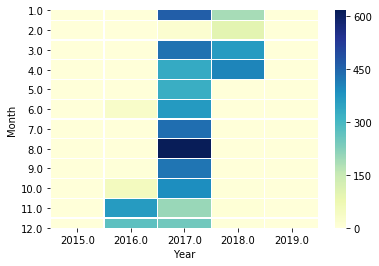

In [79]:
display(sns.heatmap(p_dates,annot=False,fmt=".2f",linewidths=.2,cmap="YlGnBu"))

In [ ]:
#wow pretty useless